### Digit Recognizer challenge (MNIST dataset)

### The idea of this notebook is to build and optimize a neuronal network architecture in order to classify handwritten digits. I am fully aware that CNNs are the go-to algorithm for image classification, and that better results could potentially be obtained using such network architecture. In our case, and just for learning purposes, we will make us of fully-connected-layers networks, as they will be used in other projects for other tasks that are not limited to image classification.

#### Data cleaning:
- Import data from csv file. In this section explonatory analysis is performed in order to asses whether we have a biased dataset and/or if there's any  missing data. 
- Split dataset into training and cv sets
#### Model design
- Play with different neuronal networks architectures. In this section we not only play with the amount of layers or the
neurons per layer, but also with the regularization term.
- Asses each model performance to establish if we are in a high bias and/or high variance regime.
- Once we know in which regime we are, we try to optimize the results by adding/reducing complexity
#### Data augmentation
- Perform error analysis to determine if there's a single category that we missclassify to a greater extent than others.
- For the sake of completion, we alter the data to showcase the power of having more data at our disposal to train our models.
####  Model re-training
- Retrain models again, now with the augmented data.
- Select best model based on ranked statistics
#### Model testing
- Test model on test training set (unseen data)                

In [1]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import Utils as udr
import importlib
importlib.reload(udr)
import os

2024-09-02 12:06:36.550331: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 12:06:36.858203: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 12:06:37.669307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Import the data
path = f'{os.getcwd()}/mnist_train.csv'
train_data = pd.read_csv(path)
train_data.head(7)

# Check if there are any duplicates
print(f"number of duplicates = {sum(train_data.duplicated())}")

# As it can be read in the description of the project,
# the first column contains the digit, a.k.a label, 
# and the other 784 columns represent pixel values from
# 0 to 255. Every row corresponds to a single
# image, which is unfolded from a 28x28 matrix.

number of duplicates = 0


In [3]:
# Get relative frequencies of images to asses if there are over/under represented categories
n,m = train_data.shape
categories = train_data['label'].nunique()
print(f"Train dataset contains {n} images")
print(f"where each image contains {m} pixels")
print(f"and each image can be classified as one of {categories} different handwritten numbers")
freq = train_data.groupby("label").size()/n
freq.name='relative frequencies'
freq
# As it can be observed, the relative frequencies of labels in the dataset
# is pretty much the same, which ensures we have a non-skewed training set

Train dataset contains 60000 images
where each image contains 785 pixels
and each image can be classified as one of 10 different handwritten numbers


label
0    0.098717
1    0.112367
2    0.099300
3    0.102183
4    0.097367
5    0.090350
6    0.098633
7    0.104417
8    0.097517
9    0.099150
Name: relative frequencies, dtype: float64

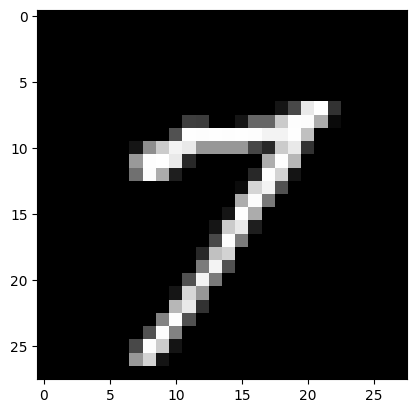

In [4]:
# We'll divide the data into a 2/3 - 1/3 split, 2/3 of it will be used 
# to compute our model parameters and 1/3 of it to fine-tune 
# the hyperparameters we're using a fixed random_state=42 to make 
# the results reproductible across multiple calls 
# (maybe good to try to remove it once we have model selected)
x_train, x_cv, y_train, y_cv = train_test_split(train_data.iloc[:,1:], train_data['label'], train_size=0.66, random_state=42)

# Plot one of the images to visualize how they look
plt.imshow(np.array(x_train.iloc[0,:]).reshape(28,28),cmap='gray', vmin=0, vmax=255)

In [5]:
# Our first shot for a classifier will be a Dense Neuronal Network
# where we'll make use of the SparseCategoricalCrossEntropy
# loss function (Softmax function, suited for a multilabel classification problem)
# as an optimizer, we'll use Adam optimizer, just a version
# of gradient descent in which the learning rate, alpha,
# changes differently for different parameters

# For the neurons, we'll make use of achitectures with reducing
# number of nodes per layer and we'll try with three different
# values of lambda (0, 0.1 and 10)
models = {'A_50_20_.0':{'nn':[50,20],
                    'lambda':0.0},
          'A_30_20_.0':{'nn':[30,20],
                    'lambda':0.0},
          'A_50_30_20_.0':{'nn':[50,30,20],
                        'lambda':0.0},
          'A_40_20_15_.0':{'nn':[40,20,15],
                        'lambda':0.0},
          'A_50_20_.1':{'nn':[50,20],
                    'lambda':0.1},
          'A_30_20_.1':{'nn':[30,20],
                    'lambda':0.1},
          'A_50_30_20_.1':{'nn':[50,30,20],
                        'lambda':0.1},
          'A_40_20_15_.1':{'nn':[40,20,15],
                        'lambda':0.1},
          'A_50_20_10.':{'nn':[50,20],
                    'lambda':10},
          'A_30_20_10.':{'nn':[30,20],
                    'lambda':10}, 
          'A_50_30_20_10.':{'nn':[50,30,20],
                        'lambda':10},
          'A_40_20_15_10.':{'nn':[40,20,15],
                        'lambda':10}}
results = {}
for model_key,model_params in models.items():
    results[model_key] = udr.build_model_and_train(model_params, x_train, y_train, x_cv, y_cv, categories, 25, 32)

print('Models trained!')

2024-09-02 12:06:42.202971: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-02 12:06:42.322285: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-02 12:06:42.322325: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-02 12:06:42.324465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-02 12:06:42.324511: I external/local_xla/xla/stream_executor

Models trained!


As it can be seen, the cost function (error) converges for all configurations, which is a sign that all parameters have been fitted to find a local minima of the cost function. Little to no value can be grasp from increasing epoch then (which would increase computation time quite substantially)

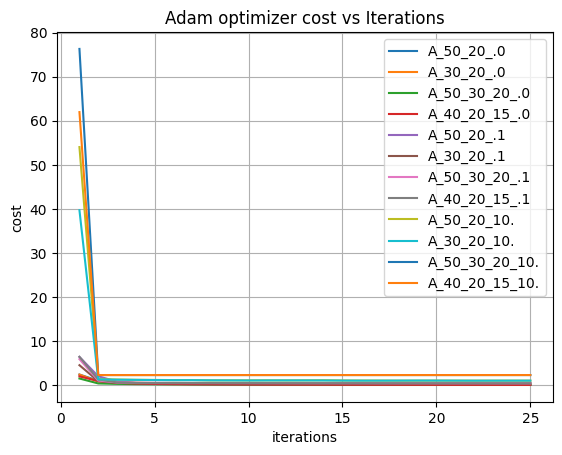

In [6]:
error_logs = [tuple([list(results[model][-5].history.values())[0],model]) for model in results] 
udr.plot_adam_cost(error_logs)

The next thing we have to determine is whether our models suffer from bias, variance, or both. In order to do so, we'll take a look at how the relationship between them changes across the parameter settings and analyze error on the training and cross validation sets.


In [7]:
model_train_cv_cost = [[model,round(stats[1],5),round(stats[2],5), round(stats[6],5), round(stats[7],5)] for model,stats in results.items()]
model_train_cv_cost = pd.DataFrame(model_train_cv_cost,columns=['model_params','J_train', 'J_cv', 'Acc_train', 'Acc_cv'])
model_train_cv_cost

,model_params,J_train,J_cv,Acc_train,Acc_cv
0,A_50_20_.0,0.01967,0.04456,0.98033,0.95544
1,A_30_20_.0,0.06313,0.08132,0.93687,0.91868
2,A_50_30_20_.0,0.01896,0.04451,0.98104,0.95549
3,A_40_20_15_.0,0.01952,0.04804,0.98048,0.95196
4,A_50_20_.1,0.06328,0.06480,0.93672,0.93520
5,A_30_20_.1,0.07598,0.07892,0.92402,0.92108
6,A_50_30_20_.1,0.06818,0.07191,0.93182,0.92809
7,A_40_20_15_.1,0.06932,0.07000,0.93068,0.93000
8,A_50_20_10.,0.19235,0.18887,0.80765,0.81113
9,A_30_20_10.,0.18508,0.18475,0.81492,0.81525


In [8]:
best_config = model_train_cv_cost.loc[model_train_cv_cost['J_cv']==min(model_train_cv_cost['J_cv']),:]
best_config

,model_params,J_train,J_cv,Acc_train,Acc_cv
2,A_50_30_20_.0,0.01896,0.04451,0.98104,0.95549


What is the human level performance we could expect from such a task? 99.99% maybe? If we compare that with the results obtained so far, we see that our best configuration delivers a 4.7% error in the cross validation set, with an error of 1.9% in the train dataset. Wrt our baseline level performance, which is at 0.001%, we consider this error still unacceptable, and we diagnose the algorithm to have **high bias** (J_test >> baseline). Note that our J_cv >> J_test, so we could consider it to have **high variance** as well.  In order to improve this, we'll consider:
- Add more layers
- Add more neurons per layer
- Since we will increase the complexity of the algorithm, we may have to increase the value of the regularization algorithm, otherwise we may incurr overfitting. Note that in the numbers above, the highest discrepancies (in relative terms) between J_cv and J_test are found when lambda parameter are 0.
- Add more data (data augmentation)

After doing that, the next thing we can do is **Error analysis** => Analyze distributions of errors to see if there's a given category that is being misclassified more than others

In [9]:
models_vol2 = {
            'A_100_50_25_.0':{'nn':[100,50,25],
                        'lambda':0.0},
            'A_100_75_50_25_.0':{'nn':[100,75,50,25],
                        'lambda':0.0},
            'A_200_100_75_50_25_.0':{'nn':[200,100,75,50,25],
                        'lambda':0.0},
            'A_200_100_50_25_.0':{'nn':[200,100,50,25],
                        'lambda':0.0},
            'A_100_50_25_.0001':{'nn':[100,50,25],
                        'lambda':0.0001},
            'A_100_75_50_25_.0001':{'nn':[100,75,50,25],
                        'lambda':0.0001},
            'A_200_100_75_50_25_.0001':{'nn':[200,100,75,50,25],
                        'lambda':0.0001},
            'A_200_100_50_25_.0001':{'nn':[200,100,50,25],
                        'lambda':0.0001},
            'A_100_50_25_.001':{'nn':[100,50,25],
                        'lambda':0.001},
            'A_100_75_50_25_.001':{'nn':[100,75,50,25],
                        'lambda':0.001},
            'A_200_100_75_50_25_.001':{'nn':[200,100,75,50,25],
                        'lambda':0.001},
            'A_200_100_50_25_.001':{'nn':[200,100,50,25],
                        'lambda':0.001},
            'A_100_50_25_.01':{'nn':[100,50,25],
                        'lambda':0.01},
            'A_100_75_50_25_.01':{'nn':[100,75,50,25],
                        'lambda':0.01},
            'A_200_100_75_50_25_.01':{'nn':[200,100,75,50,25],
                        'lambda':0.01},
            'A_200_100_50_25_.01':{'nn':[200,100,50,25],
                        'lambda':0.01},       
          }

i=0
results_vol2 = {}
# We've incremented the epoch of the algorithms as they're more complex than before, so maybe
# we need extra iterations to make the parameters converge
for model_key,model_params in models_vol2.items():
    results_vol2[model_key] = udr.build_model_and_train(model_params, x_train, y_train, x_cv, y_cv, categories, 50, 32)
    i+=1
    print(f"Progress...{i/len(models_vol2)}")

Progress...0.0625
Progress...0.125


I0000 00:00:1725272361.573792  701657 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_664', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1725272361.650074  701645 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_664', 8 bytes spill stores, 8 bytes spill loads



Progress...0.1875
Progress...0.25
Progress...0.3125
Progress...0.375
Progress...0.4375
Progress...0.5
Progress...0.5625
Progress...0.625
Progress...0.6875
Progress...0.75
Progress...0.8125
Progress...0.875
Progress...0.9375
Progress...1.0


We can see below that with epoch=100 our CrossEntropy cost function already converges, so that indicates our estimates are robust and succesfully find a local minima for the cost function. No need to push epoch further.

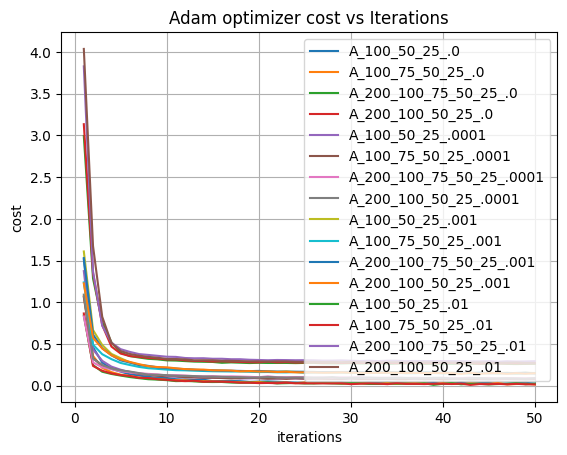

In [10]:
error_logs = [tuple([list(results_vol2[model][-5].history.values())[0],model]) for model in results_vol2] 
udr.plot_adam_cost(error_logs)

In [11]:
model_train_cv_cost_vol2 = [[model,round(stats[1],5),round(stats[2],5), round(stats[6],5), round(stats[7],5)] for model,stats in results_vol2.items()]
model_train_cv_cost_vol2 = pd.DataFrame(model_train_cv_cost_vol2,columns=['model_params','J_train', 'J_cv', 'Acc_train', 'Acc_cv'])
best_model = model_train_cv_cost_vol2.loc[model_train_cv_cost_vol2['J_cv']==min(model_train_cv_cost_vol2['J_cv']),:]
print(f"best model results are: {best_model}")
model_train_cv_cost_vol2

best model results are:             model_params  J_train     J_cv  Acc_train   Acc_cv
2  A_200_100_75_50_25_.0  0.00348  0.02387    0.99652  0.97613


,model_params,J_train,J_cv,Acc_train,Acc_cv
0,A_100_50_25_.0,0.01588,0.04221,0.98412,0.95779
1,A_100_75_50_25_.0,0.00341,0.02863,0.99659,0.97137
2,A_200_100_75_50_25_.0,0.00348,0.02387,0.99652,0.97613
3,A_200_100_50_25_.0,0.00298,0.02608,0.99702,0.97392
4,A_100_50_25_.0001,0.01023,0.03191,0.98977,0.96809
5,A_100_75_50_25_.0001,0.00601,0.02922,0.99399,0.97078
6,A_200_100_75_50_25_.0001,0.00422,0.02471,0.99578,0.97529
7,A_200_100_50_25_.0001,0.00914,0.03078,0.99086,0.96922
8,A_100_50_25_.001,0.01972,0.03593,0.98028,0.96407
9,A_100_75_50_25_.001,0.01303,0.02926,0.98697,0.97074


Second iteration has provided a better overall results, with both J_test and J_cv being diminished. J_test is almost at the level we wanted it to be, but J_cv >> J_train still (high variance). This is an indication that the model fails to generalize on unseen data. In order to solve that, we can perform some data augmentation on the input dataset to make it bigger. Prior to that, let's perform some **error analysis** (see if the classifier is more prone to fail for a specific number)

In [12]:
erorr_train = dict((model,stats[-4]) for model,stats in results_vol2.items())
errors_train = pd.DataFrame.from_dict(erorr_train,orient='index')
errors_train

,8,3,4,5,7,2,6,9,1,0
A_100_50_25_.0,0.227345,0.060413,0.028617,0.340223,0.124006,0.079491,0.055644,0.055644,0.017488,0.011129
A_100_75_50_25_.0,0.022222,0.088889,0.074074,0.096296,0.148148,0.192593,0.103704,0.044444,0.214815,0.014815
A_200_100_75_50_25_.0,0.289855,0.072464,0.057971,0.043478,0.050725,0.101449,0.086957,0.210145,0.079710,0.007246
A_200_100_50_25_.0,0.144068,0.110169,0.118644,0.135593,0.194915,0.169492,0.008475,0.059322,0.025424,0.033898
A_100_50_25_.0001,0.071605,0.180247,0.074074,0.130864,0.093827,0.059259,0.039506,0.232099,0.029630,0.088889
A_100_75_50_25_.0001,0.197479,0.100840,0.071429,0.134454,0.197479,0.159664,0.025210,0.079832,0.008403,0.025210
A_200_100_75_50_25_.0001,0.089820,0.173653,0.203593,0.089820,0.125749,0.053892,0.023952,0.161677,0.011976,0.065868
A_200_100_50_25_.0001,0.207182,0.044199,0.267956,0.121547,0.063536,0.038674,0.118785,0.080110,0.027624,0.030387
A_100_50_25_.001,0.252241,0.064020,0.093470,0.072983,0.180538,0.096031,0.064020,0.107554,0.016645,0.052497
A_100_75_50_25_.001,0.166667,0.089147,0.114341,0.112403,0.127907,0.093023,0.058140,0.155039,0.038760,0.044574


In [13]:
# Errors for our best param configuration
errors_train.loc[errors_train.index==best_model['model_params'].iloc[0],:].T

,A_200_100_75_50_25_.0
8,0.289855
3,0.072464
4,0.057971
5,0.043478
7,0.050725
2,0.101449
6,0.086957
9,0.210145
1,0.079710
0,0.007246


In [14]:
# For the best model, get the three categories with the highest errors and
# perform data agumentation for those
cat_with_highest_err = errors_train.loc[errors_train.index==best_model['model_params'].iloc[0],:].T.sort_values(by=best_model['model_params'].iloc[0], ascending=False).index[:3]
cat_with_highest_err

Index([8, 9, 2], dtype='int64')

As it can be seen from error analysis, it seems that the algorithm is having some issues with classifying the numbers **cat_with_highest_err** specifically. We'll take this results into the next part, which is **data augmentation**

The idea behind data augmentation is that we will make our algorithm better by feeding it more examples of images which are linearly independent from the original ones. In this way we ensure that the algorithm will see new data, and hopefully can learn new features out of it. How we will create new data? We will mainly manipulate the images in two ways: 

- Rotating the image (linear transformation)
- Adding some white random noise over the white pixels (non-linear transformation)

Nevertheless, we have to make sure that the "created data" is still valid, or in other words, that its resemblance with the original data is high. For this reason, we will play with different parameters of rotation and white noise to make sure a human could still recognize the numbers being displayed. cat_with_highest_err are the problematic numbers, we'll pay special attention to those (examine an example for each one of them)

<Figure size 640x480 with 0 Axes>

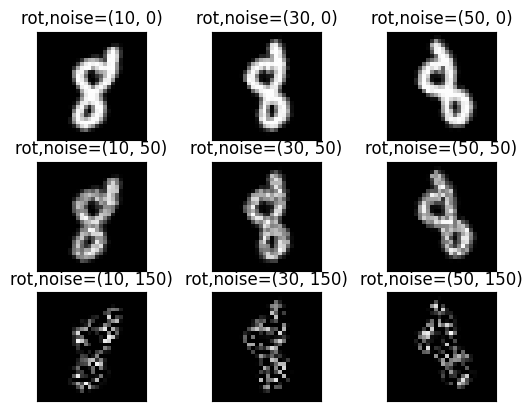

<Figure size 640x480 with 0 Axes>

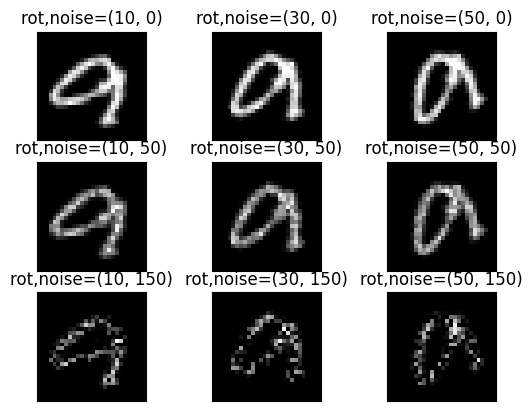

<Figure size 640x480 with 0 Axes>

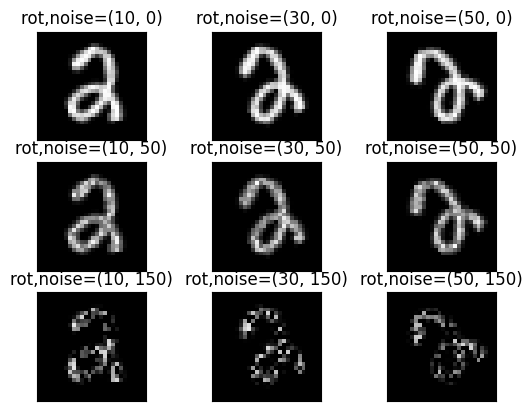

In [15]:
for cat in cat_with_highest_err:
    example = x_train.loc[list(y_train.loc[y_train==cat].index)[2],:]
    new_images = udr.perform_data_agumentation(example,
                                                cat,
                                                [[10,0],[30,0],[50,0],
                                                [10,50],[30,50],[50,50],
                                                [10,150],[30,150],[50,150]])

From the results above: 
- Rotation: 10 degrees rotation is still acceptable, 30 seems a bit much already =>  we'll force the rotation 
  to be in the interval -20,-10, +10, +20
- Distorsion: 50% distorsion still makes the figure readable, albeit we'd expect this
  parameter to have less explanatory power than the rotation, so we'll only have two values => distorsion will be 0 and 35

In [16]:
alterations = [[-20,0],[-10,0],[10,0],[20,0],
               [-20,35],[-10,35],[10,35],[20,35]]

augmented_data = []
data_to_augment = train_data.loc[train_data["label"].isin(cat_with_highest_err),:]
# We have some issues dealing with that amount of data locally,
# so what we'll do is get half of selected numbers
data_to_augment = data_to_augment.loc[data_to_augment.index[:int(0.33*len(data_to_augment))],:]
counts = data_to_augment.groupby(["label"]).size()
print(f"number of examples on each label={counts}") 

print('Performing data augmentation...')
for idx,row in data_to_augment.iterrows():
    label = row[0]
    image = row[1:]
    augmented_data.extend(udr.perform_data_agumentation(image, label, alterations, False))
print('Data augmentation finalized!')

number of examples on each label=label
2    1927
8    1921
9    2012
dtype: int64
Performing data augmentation...


/tmp/ipykernel_687280/2696736624.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[0]


Data augmentation finalized!


In [17]:
augmented_train_data = pd.DataFrame(augmented_data,columns=train_data.columns)
augmented_train_data = pd.concat([augmented_train_data,train_data])

# Check and remove duplicates
i = len(augmented_train_data)
augmented_train_data.drop_duplicates(inplace=True)
print(f"% of duplicates {1.00 - i/len(augmented_train_data)}")

% of duplicates 0.0


In [18]:
x_aug_train, x_aug_cv, y_aug_train, y_aug_cv = train_test_split(augmented_train_data.iloc[:,1:], augmented_train_data['label'], train_size=0.66, random_state=42)
print(f"We've increased the dataset by {len(augmented_train_data)/len(train_data)}x times")

We've increased the dataset by 1.7813333333333334x times


In [19]:
results_after_augm = {}
# Note we are training the model taking as a starting point the previous
# iteration, so our model does not get trained from scratch.
for model_key,model_params in models_vol2.items():
    if model_key==best_model['model_params'].iloc[0]:
        model = results_vol2[model_key][0]
        results_after_augm[model_key] = udr.train(model, x_aug_train, y_aug_train, x_aug_cv, y_aug_cv, 50, 32)
print('Model trained after data augmentation!')

I0000 00:00:1725273928.942287  725047 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_391', 8 bytes spill stores, 8 bytes spill loads



Model trained after data augmentation!


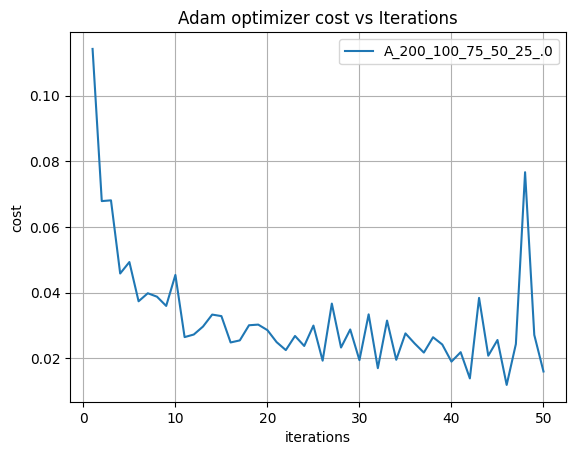

In [20]:
# Plot cost of the training set
error_logs = [tuple([list(results_after_augm[model][-5].history.values())[0],model]) for model in results_after_augm] 
udr.plot_adam_cost(error_logs)

In [21]:
#model, j_train, j_cv, history, error_train, error_cv, acc_train, acc_cv
model_train_cv_after_aug = [[model, round(stats[1],5), round(stats[2],5), round(stats[6],5), round(stats[7],5)] for model,stats in results_after_augm.items()]
model_train_cv_after_aug = pd.DataFrame(model_train_cv_after_aug,columns=['model_params','J_train', 'J_cv','Acc_train', 'Acc_cv' ])
new_best_model = model_train_cv_after_aug.loc[model_train_cv_after_aug['J_cv']==min(model_train_cv_after_aug['J_cv']),:]

print(f"new result (after data augmentation)={new_best_model}")
# Compare with the old result
print(f"old result (prior to data augmentation)={best_model}")

new result (after data augmentation)=            model_params  J_train     J_cv  Acc_train   Acc_cv
0  A_200_100_75_50_25_.0  0.00232  0.01274    0.99768  0.98726
old result (prior to data augmentation)=            model_params  J_train     J_cv  Acc_train   Acc_cv
2  A_200_100_75_50_25_.0  0.00348  0.02387    0.99652  0.97613


As it can be seen from the results above, we made the algorithm perform around 1% better on the cross_validation metric. Seems a good improvement, but nothing crazy either. The challenge specifies that the metric to be ranked will be the categorization accuracy, or in other words, the proportion of images that are correctly classified divided by the total number of images

In [26]:
# Finally use the trained model to classify new unseen data and save it to a csv to be uploaded
test_data = pd.read_csv(f'{os.getcwd()}/mnist_test.csv')
model = results_after_augm[new_best_model['model_params'].iloc[0]][0]

# First column of test data indicates which number the image corresponds to
predictions = udr.predict(model, test_data.iloc[:,1:])

abs_error, err_analysis, acc = udr.compute_J(predictions, test_data.iloc[:,0])
print(f"Error on the test dataset = {round(abs_error,3)}, accuracy={round(acc,3)}")

# Create the submission dataset
submission = pd.DataFrame(predictions)
submission.to_csv(f'{os.getcwd()}/submission.csv')

Error on the test dataset = 0.024, accuracy=0.976
